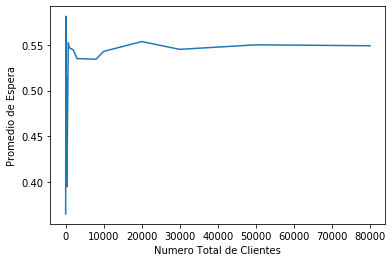

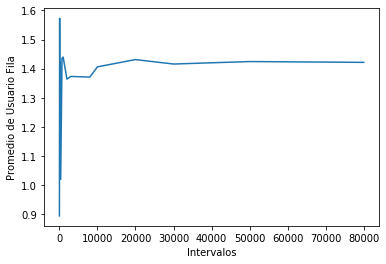

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random # Genera numeros aleatorios


cola_De_Espera = [] # Representa la fila del banco
llegada = []; #Llegadas de clientes
salida = []; #Salidas de clientes
intervalos_Clientes = []; #Se iran almacenando cada uno de los intervalos para cada cliente
arr_Prom_Espera = []; #Alamcena los promedios de espera de todas las simulaciones
arr_Intervalos = []; #Guarda el valor de la variable intervalos para cada simulacion
arr_Prom_Sistema = []

def simulacion(iteraciones):
    contador = 0 #Contador de iteraciones
    contador_Clientes = 0; #Contador de clientes en el sistema
    clientes_Sistema = 0; #Guarda el promedio de clientes en el sistema
    arr_Intervalos.append(iteraciones)
    dt= 0 # Será el aumento de tiempo del programa
    estancia = 0; #Guarda la diferencia del tiempo de salida menos el tiempo de llegada
    sumatoria = 0; #Suma de cada uno de los intervalos
    promedio_Espera = 0; #Almacena el promedio de espera a lo largo de la simulacion
    estado = 0;
    
    # El while representa el horario del banco
    while (dt < iteraciones or len(cola_De_Espera) > 0):
        
        #rA: Numero aleatorio para cuando llega un cliente
        #rD: Numero aleatorio para cuando un cliente se va
        rA = np.random.uniform(0.0, 1.0)                            
        rD = np.random.uniform(0.0, 1.0)            
        
        # Si es el primer cliente que llega: Sólo generamos una salida         
        if(len(cola_De_Espera) == 0):
            rD = 0.5      
            
        
        # Cuando llega un cliente
        # Si el cliente es el primero que llega no se puede ir, ya que su dt = 0,
        # es decir, no estaria ningun lapso de tiempo en el banco    
        if(rA < 0.259):
            #Numero aleatorio para cuando un cliente            
            llegada.append(dt) #Alamceamos la llegada en el tiempo dt
            cola_De_Espera.append(1)# Formamos al cliente en la fila            
            contador_Clientes += 1 #Aumentamos el contador que nos servirá para calcula el promedio de espera


        #Cuando un cliente se va             
        if (rD < 0.393 and len(cola_De_Espera) >= 0):            
            salida.append(dt); #Almacenamos el tiempo de salida
            if(len(salida) > 0):# Comprobamos que haya a quien sacar de la fila 
                estancia = salida[0] - llegada[0]  #Calculamos el tiempo de estancia del cliente
                intervalos_Clientes.append(estancia) #Almacenamos las estancias que se ocuparan para calcular el promedio de espera
                cola_De_Espera.pop(0); #Sacamos al cliente que acaba de dejar el banco       
                salida.pop(0); #Quitamos el tiempo de salida de la lista
                llegada.pop(0);#Quitamos el tiempo de llegada de la lista
                sumatoria += estancia; #Sumamos todas las estancias de cada uno de los clientes
                estancia = 0; #Reiniciamos la estancia para otro cliente
            
        
        
        
        dt += 0.1; #Aumentamos el tiempo del banco      
        clientes_Sistema += len(cola_De_Espera) #Calculamos los clientes en el sistema en cada iteracion
        contador += 1 #Aumentamos el contador de iteraciones
    
    promedioClientesSistema = clientes_Sistema / contador  #Guarda el promedio de los cliente en el sistema
    promedio_Espera = sumatoria / contador_Clientes #Guarda el promedio de espera de los clientes
    arr_Prom_Espera.append(promedio_Espera) #Guarda todos los promedios de espera
    arr_Prom_Sistema.append(promedioClientesSistema) #Guarda todos los promedios de clientes en el sistema
        


def dibujaGrafica(numIntervalos, arr_Prom_Espera):
    plt.xlabel("Numero Total de Clientes")
    plt.ylabel("Promedio de Espera")
    plt.plot(numIntervalos, arr_Prom_Espera)
    plt.show()

#Grafica de promedio de clientes en la fila
def dibujaGraficaDos(numIntervalos, arr_Prom_Sistema):
    plt.xlabel("Intervalos")
    plt.ylabel("Promedio de Usuario Fila")
    plt.plot(numIntervalos, arr_Prom_Sistema)
    plt.show()
    

simulacion(20)
simulacion(80)
simulacion(160)
simulacion(250)
simulacion(350)
simulacion(700)
simulacion(1000)
simulacion(2000)
simulacion(3000)
simulacion(8000)
simulacion(10000)
simulacion(20000)
simulacion(30000)
simulacion(50000)
simulacion(80000)

# Dibuja la grafica del promedio de espera de los clientes
dibujaGrafica(arr_Intervalos, arr_Prom_Espera)

#Grafica de promedio de clientes en la fila
dibujaGraficaDos(arr_Intervalos, arr_Prom_Sistema)

